In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import colormaps
from matplotlib.colors import Normalize

Wczytywanie danych

In [197]:
database = pd.read_csv('car_prices.csv')

Wyczyszczenie danych z pojazdów których ilość jest mniejsza niż 0,01%

In [198]:
database['make'] = database['make'].str.title()
models_count_by_make = database.groupby('make')['make'].transform('count')
database = database[models_count_by_make >=len(database)*0.0001]

KeyboardInterrupt: 

Wykres ilości sprzedanych pojazdów wg. marek

In [ ]:
model_car_sum = database['make'].value_counts()
model_car_filtered = model_car_sum[model_car_sum>500]

plt.figure(figsize=(20, 6))
plt.bar(model_car_filtered.index, model_car_filtered.values, color='skyblue')
plt.xlabel('Model samochodu')
plt.ylabel('Liczba transakcji')
plt.title('Ilość sprzedanych pojazdów wg marki')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Średni przebieg pojazdów wg marki

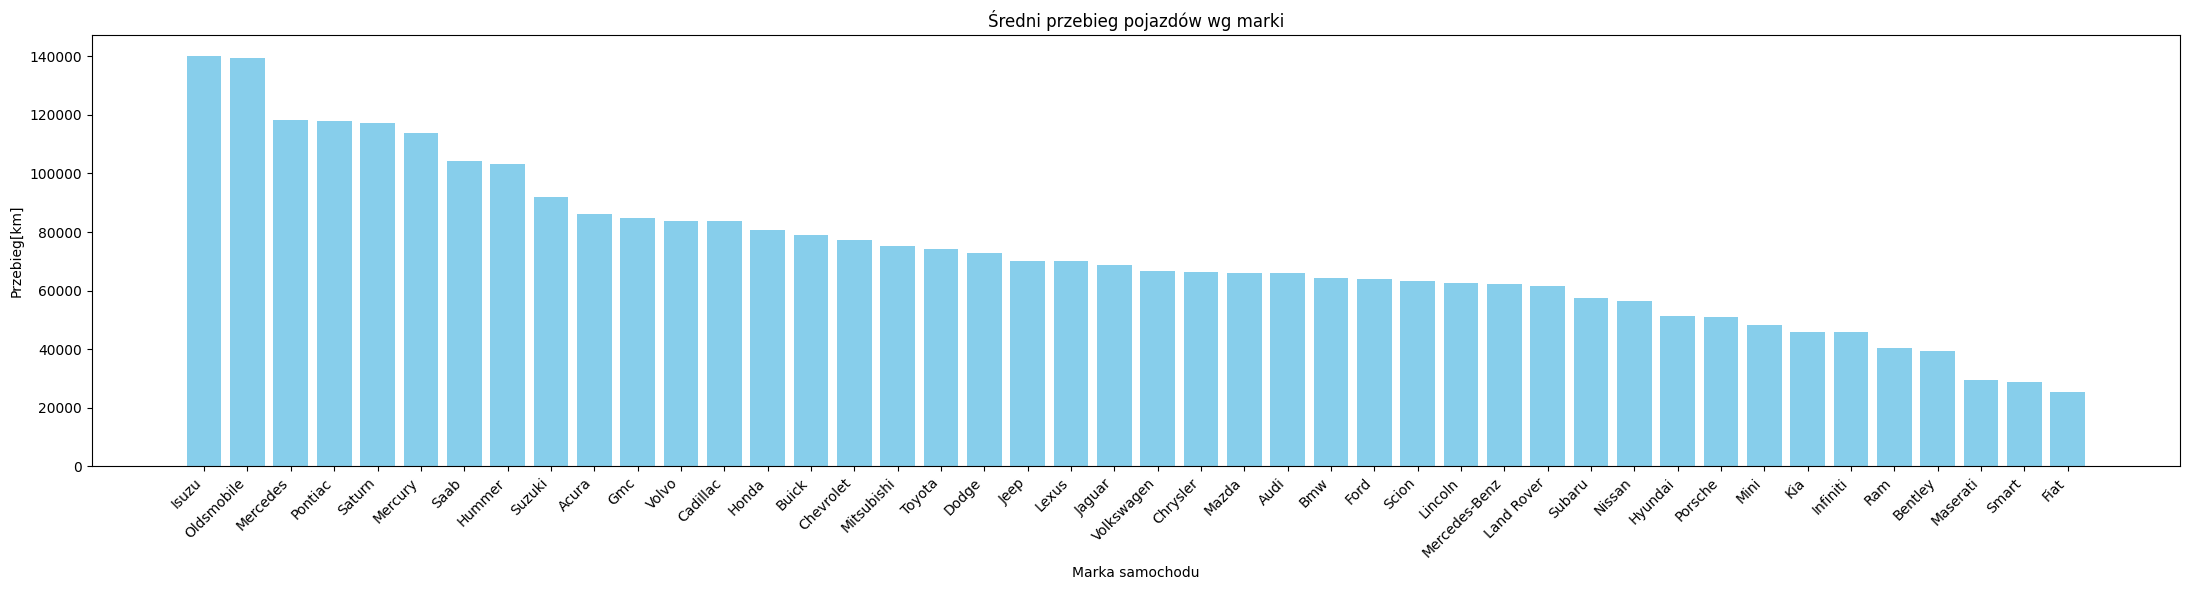

In [ ]:
mean_odometer = database.groupby('make')['odometer'].mean()
mean_odometer_sorted = mean_odometer.sort_values(ascending=False)

plt.figure(figsize=(22, 6))
plt.bar(mean_odometer_sorted.index, mean_odometer_sorted.values, color='skyblue')
plt.xlabel('Marka samochodu')
plt.ylabel('Przebieg[km]')
plt.title('Średni przebieg pojazdów wg marki')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


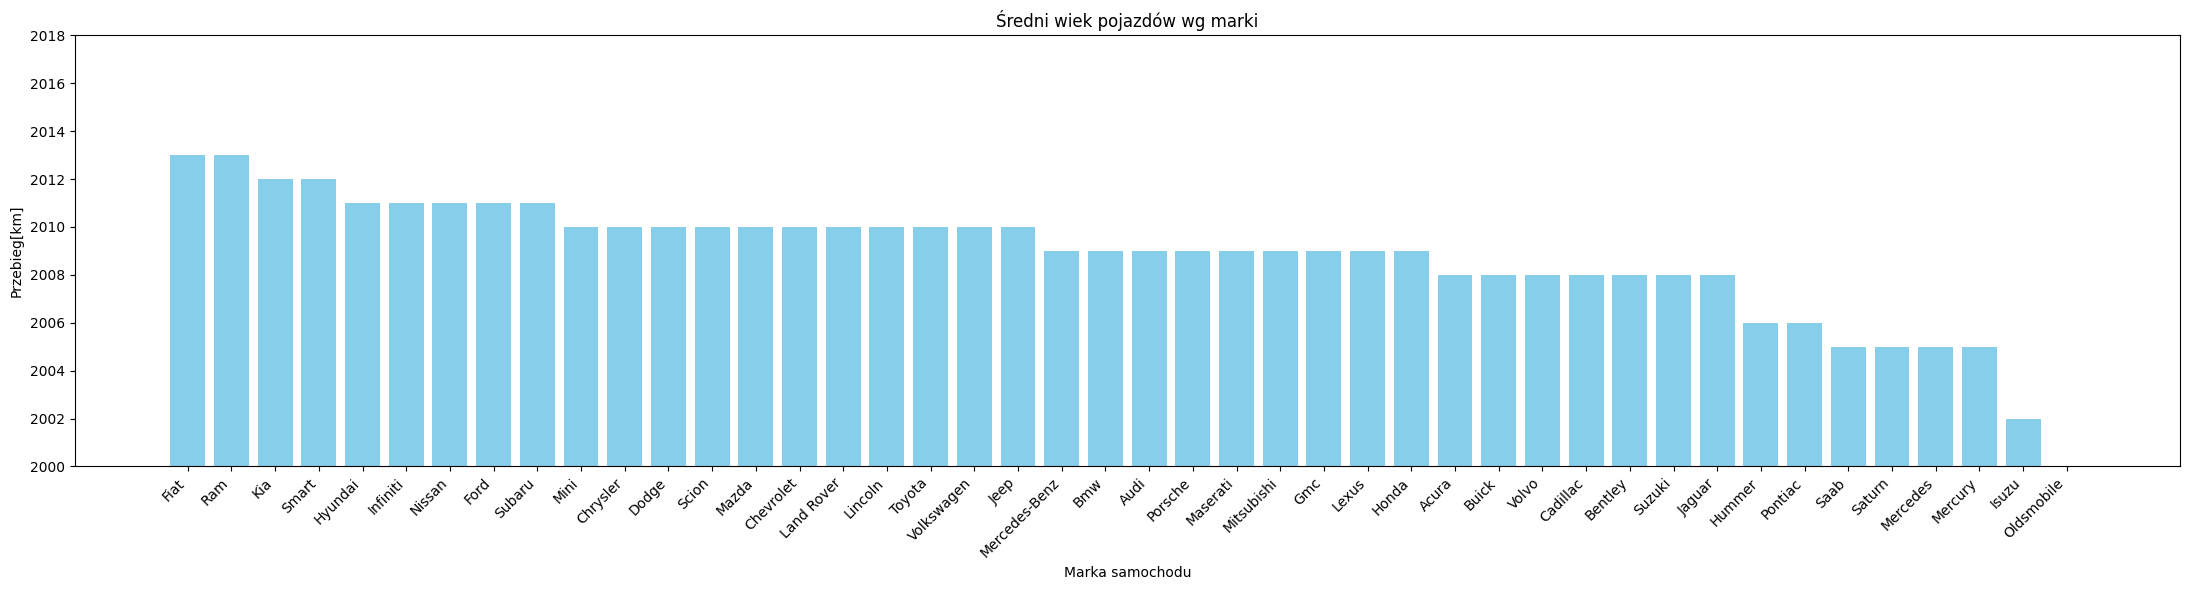

In [ ]:

mean_age = database.groupby('make')['year'].mean()
mean_age_sorted = mean_age.sort_values(ascending=False).round().astype(int)


plt.figure(figsize=(22, 6))
plt.bar(mean_age_sorted.index, mean_age_sorted.values, color='skyblue')
plt.xlabel('Marka samochodu')
plt.ylabel('Przebieg[km]')
plt.title('Średni wiek pojazdów wg marki')
plt.xticks(rotation=45, ha='right')
plt.ylim(2000, 2018)
plt.tight_layout()
plt.show()

Średnia cena pojazdu wg marki

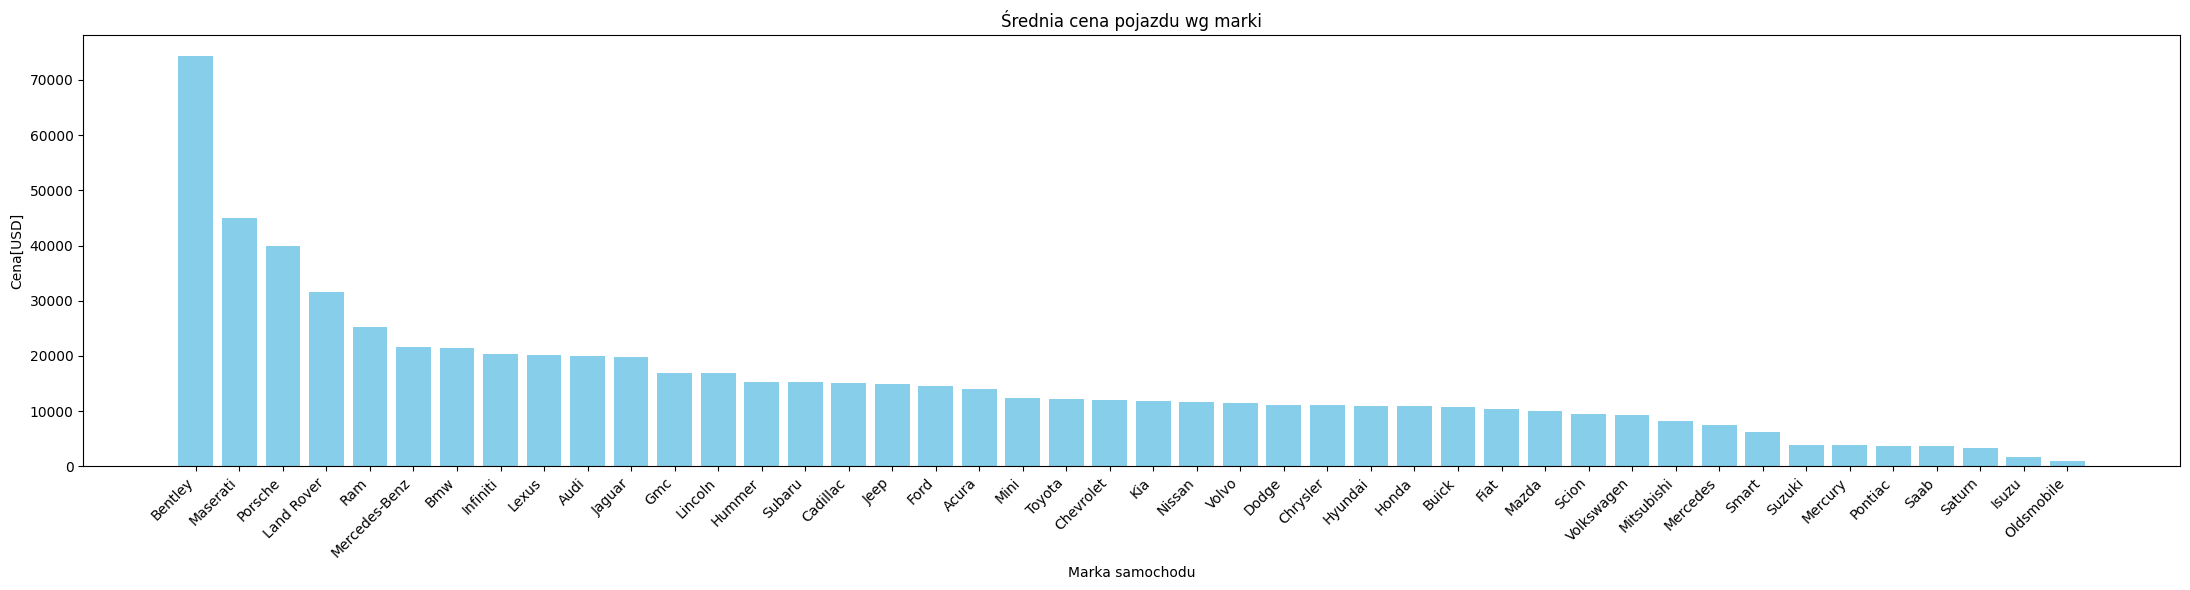

In [ ]:
mean_price = database.groupby('make')['sellingprice'].mean()
mean_price_sorted = mean_price.sort_values(ascending=False).round().astype(int)


plt.figure(figsize=(22, 6))
plt.bar(mean_price_sorted.index, mean_price_sorted.values, color='skyblue')
plt.xlabel('Marka samochodu')
plt.ylabel('Cena[USD]')
plt.title('Średnia cena pojazdu wg marki')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

10 najdroższych marek wraz z 5 modelami

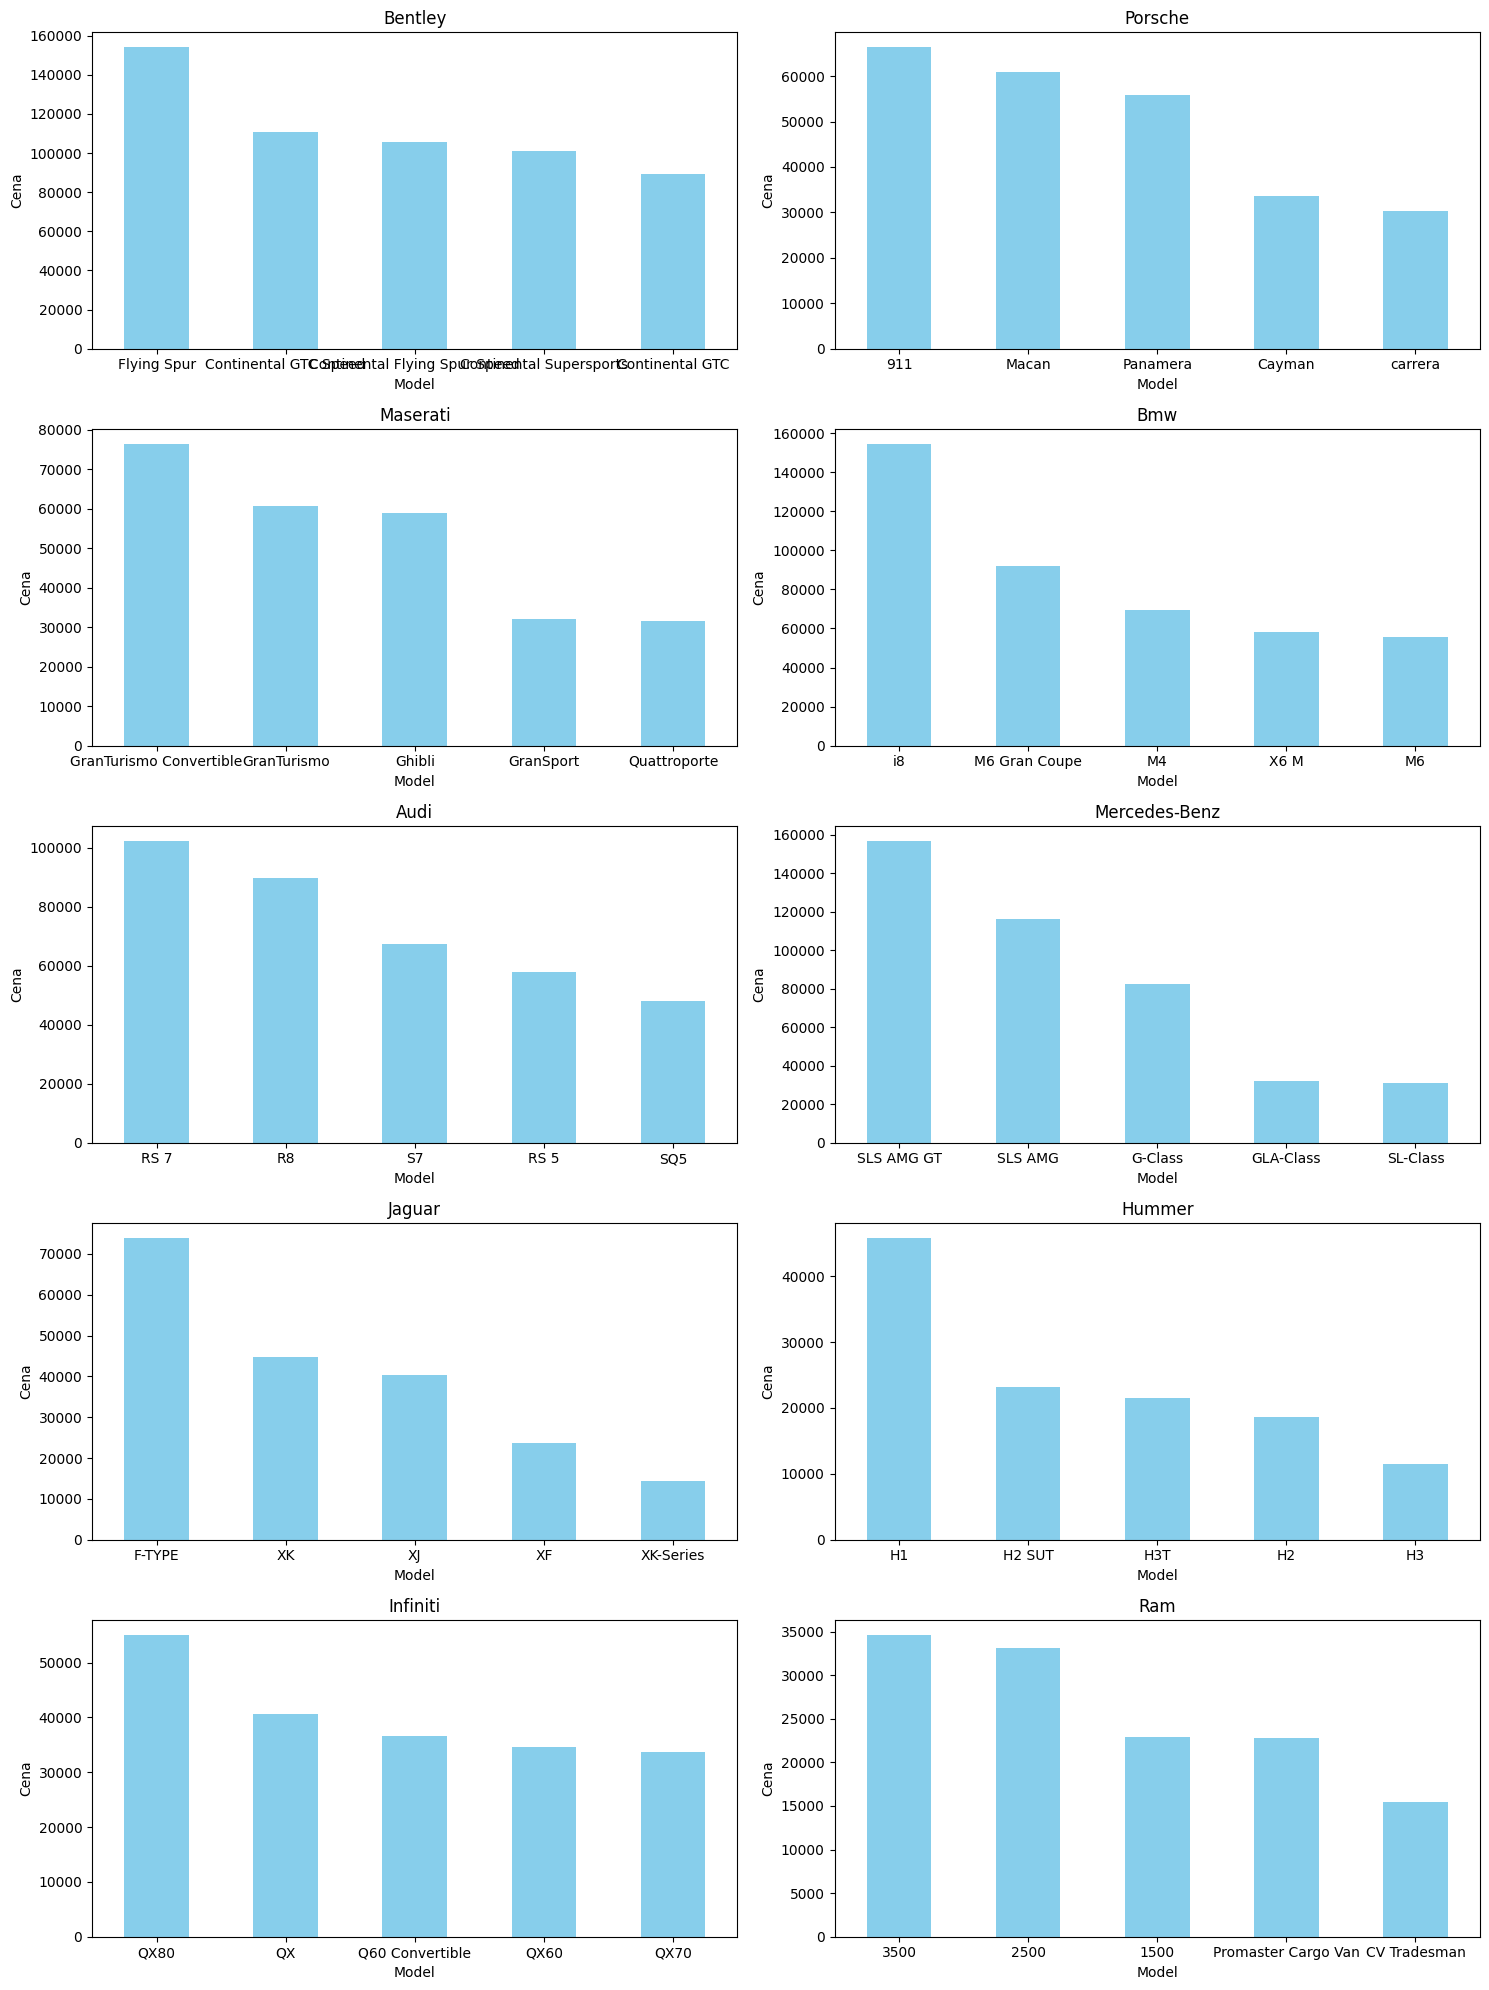

In [ ]:
average_prices = database.groupby(['make', 'model'])['sellingprice'].mean()

top_makes = average_prices.groupby('make').mean().nlargest(10)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 2 * len(top_makes)))

for i, (make, avg_price) in enumerate(top_makes.items()):
    top_models = average_prices.loc[make].nlargest(5)
    
    top_models.plot(kind='bar', ax=axes[i // 2, i % 2], color='skyblue')
    
    axes[i // 2, i % 2].set_title(make)
    axes[i // 2, i % 2].set_ylabel('Cena')
    axes[i // 2, i % 2].set_xlabel('Model')
    axes[i // 2, i % 2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()